# Project: Credit Card Fraud Detection

# About the dataset:

Link to hte dataset at GitHub: https://github.com/rashida048/Datasets/blob/master/fraud_data.csv

This dataset is about credit card fraud detection. It is very likely that a bank will not share its client information with a data scientist. So, the feature names won’t be available. It has a binary column that indicates if a transaction is fraudulent or not. This dataset can be used for classification models.

### Conclusion: 98% fraudulent credit card transactions were detected with Random Forest classifier using SMOTE technique to treat imbalanced data.

# STEP 1: Learning the dataset and feature engineering

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # for Q-Q plots

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
df = pd.read_csv("fraud_data.csv")

Learning the dataset and making feature engineering

In [8]:
# showing first five rows of the dateset
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [22]:
# showing the column names
# list(df.columns)

In [9]:
# showing statistical information about the dataset
# df.info()

In [11]:
# showing statistical data of the dataset
# df.describe()

In [12]:
# checking missing values
df.isnull().any(axis = 1).sum()

0

In [14]:
# checking duplicated rows
df.duplicated().sum()

143

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
# checking duplicated rows
df.duplicated().sum()

0

### Exploring the dataset

Text(0.5, 1.0, 'Class')

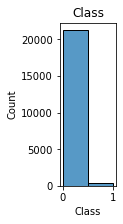

In [23]:
# plotting the class column

# define figure size
plt.figure(figsize=(1, 3))

# histogram
sns.histplot(df['Class'], bins=2);
plt.title('Class')

In [24]:
# counting bankrupted and non-bankrupted companies
df['Class'].value_counts()

0    21204
1      346
Name: Class, dtype: int64

In [25]:
# counting percentage of negative (0) and positive (1) values 
df['Class'].value_counts(normalize=True)

0    0.983944
1    0.016056
Name: Class, dtype: float64

Discussion: The dataset is imbalanced.

### Exploring the variables

Visualize data columns

Explore distribution, skewness, outliers and other statistical properties

Looking at the distributions of the variables to see which imputation to use

In [26]:
# function to create histogram, Q-Q plot and boxplot


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [27]:
# a function for plotting a str column of df and testing for normality

def draw_and_test(str):
    # plotting variable
    diagnostic_plots(df, str)

    # testing for normality
    print(str)
    skewness = df[str].skew()
    print('Skewness is {:.2f}'.format(skewness))
    kurtosis = df[str].kurtosis()
    print('Kurtosis is {:.2f}'.format(kurtosis))

In [28]:
# plotting and testing variable
# str = 'ROA(C) before interest and depreciation before interest'
# draw_and_test(str)

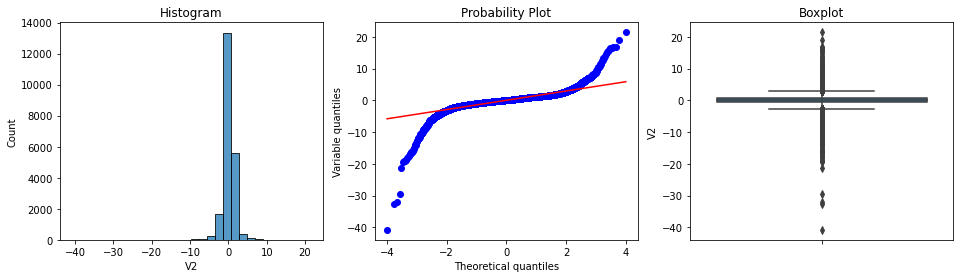

V2
Skewness is -2.46
Kurtosis is 55.60


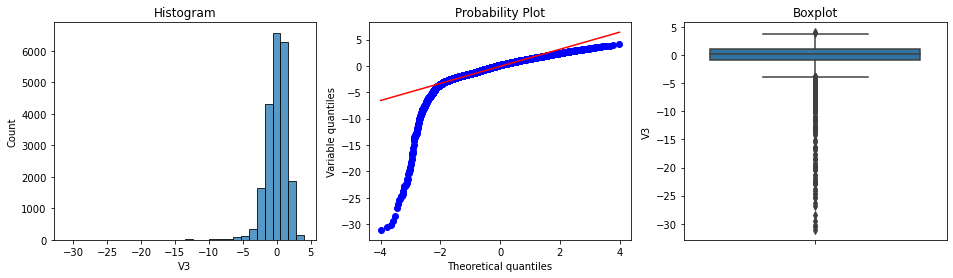

V3
Skewness is -4.42
Kurtosis is 48.09


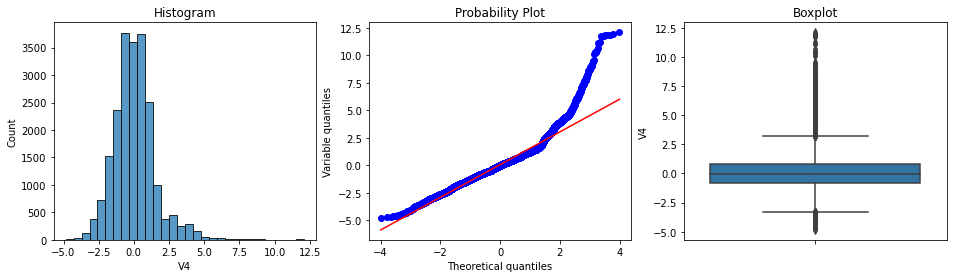

V4
Skewness is 1.19
Kurtosis is 4.89


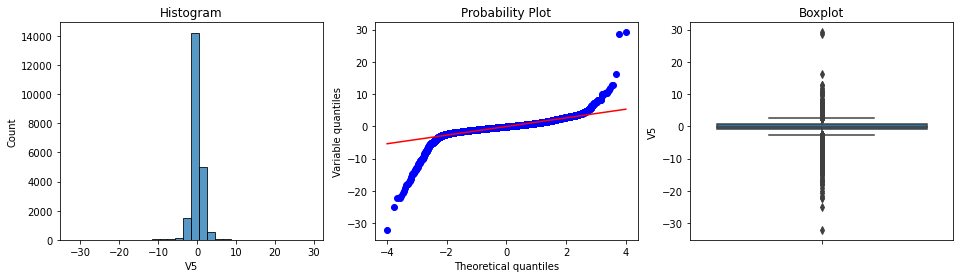

V5
Skewness is -1.91
Kurtosis is 51.98


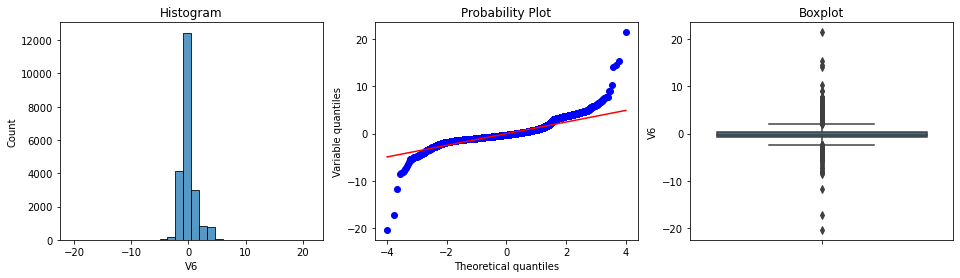

V6
Skewness is 1.28
Kurtosis is 12.75


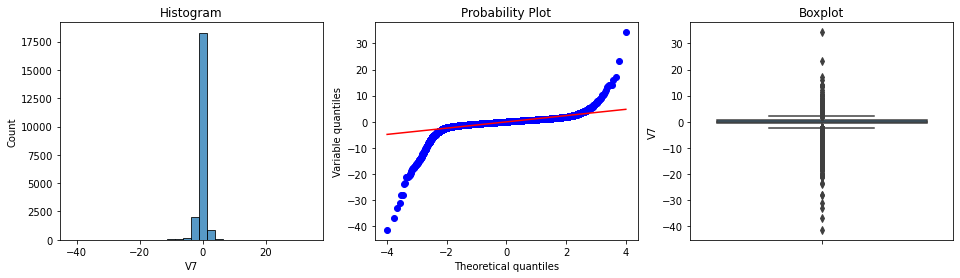

V7
Skewness is -5.30
Kurtosis is 116.75


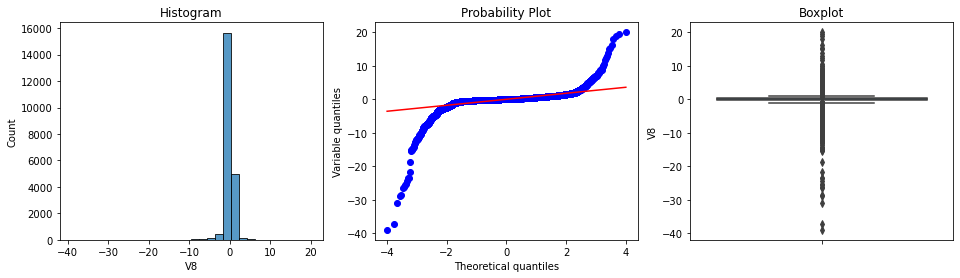

V8
Skewness is -7.25
Kurtosis is 177.95


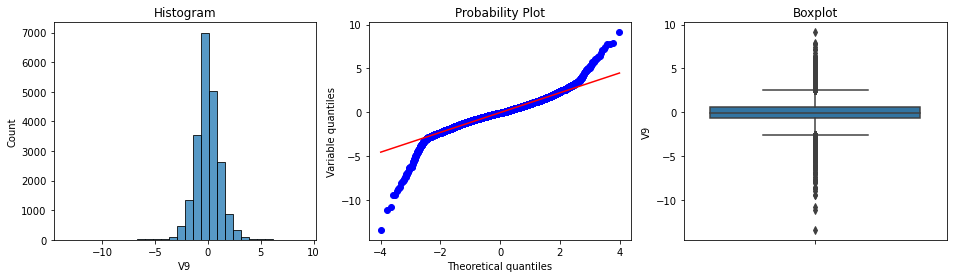

V9
Skewness is -0.24
Kurtosis is 6.12


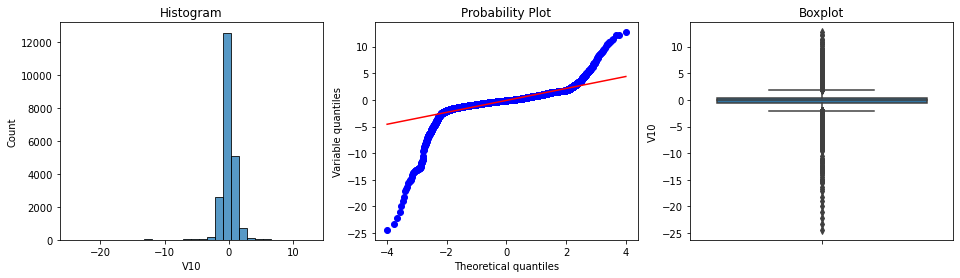

V10
Skewness is -3.34
Kurtosis is 50.72


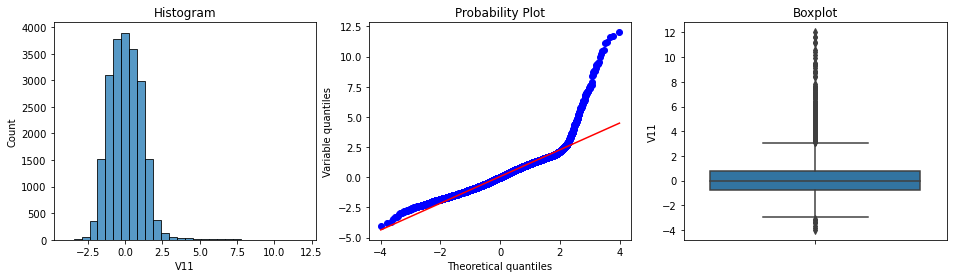

V11
Skewness is 1.40
Kurtosis is 8.30


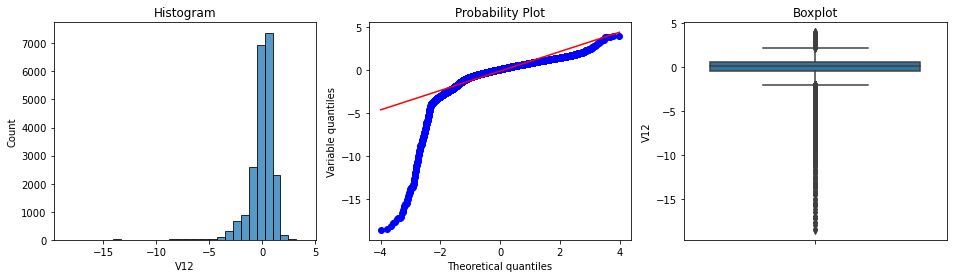

V12
Skewness is -4.69
Kurtosis is 41.51


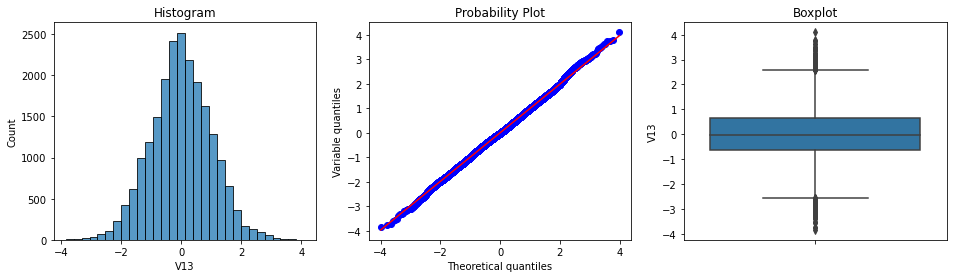

V13
Skewness is 0.03
Kurtosis is 0.17


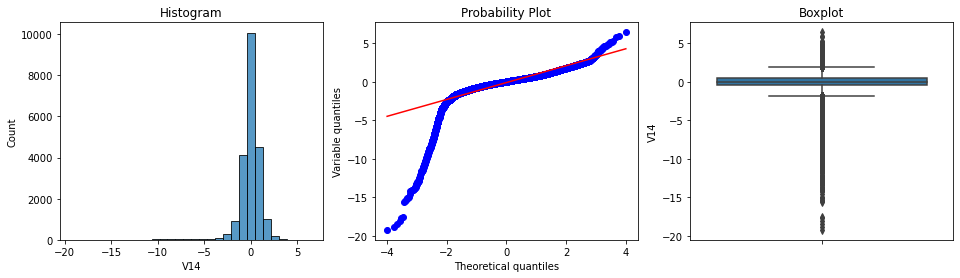

V14
Skewness is -4.68
Kurtosis is 40.99


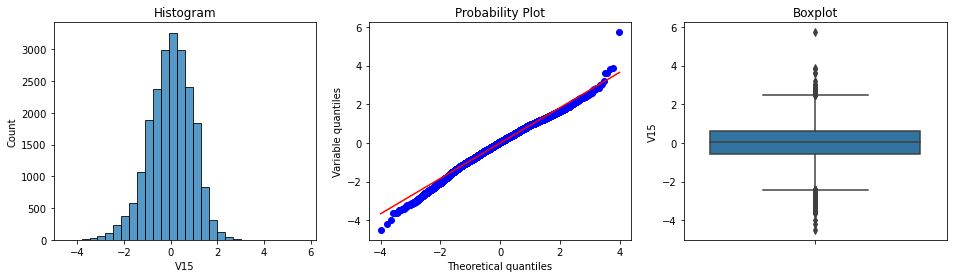

V15
Skewness is -0.32
Kurtosis is 0.38


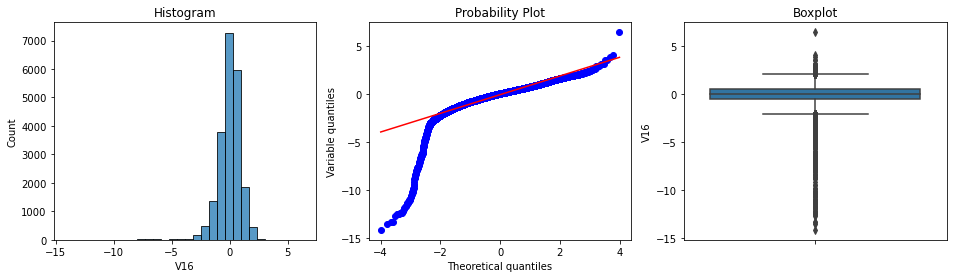

V16
Skewness is -3.47
Kurtosis is 29.91


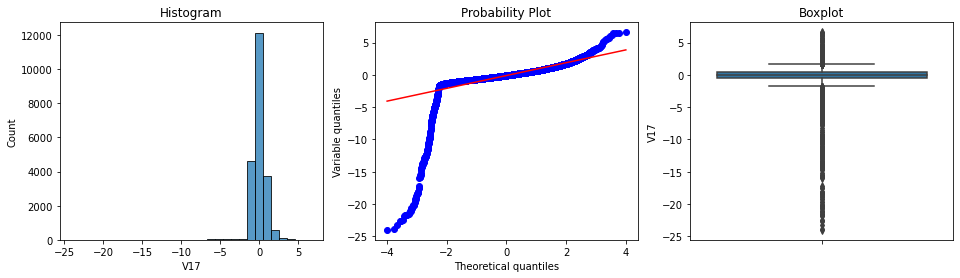

V17
Skewness is -7.93
Kurtosis is 100.75


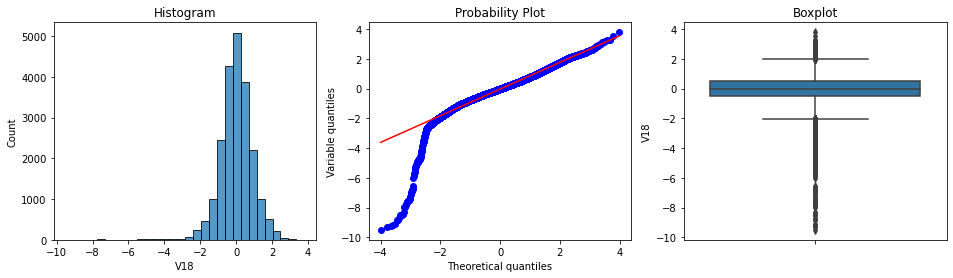

V18
Skewness is -1.47
Kurtosis is 10.96


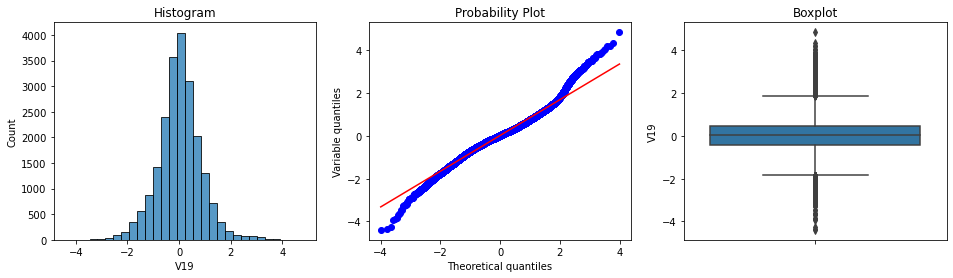

V19
Skewness is 0.17
Kurtosis is 1.87


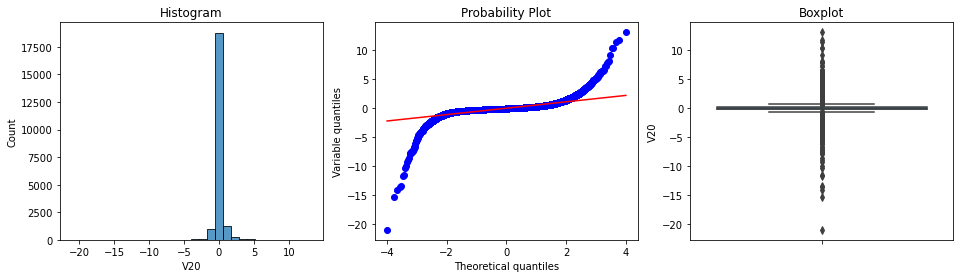

V20
Skewness is -1.81
Kurtosis is 106.28


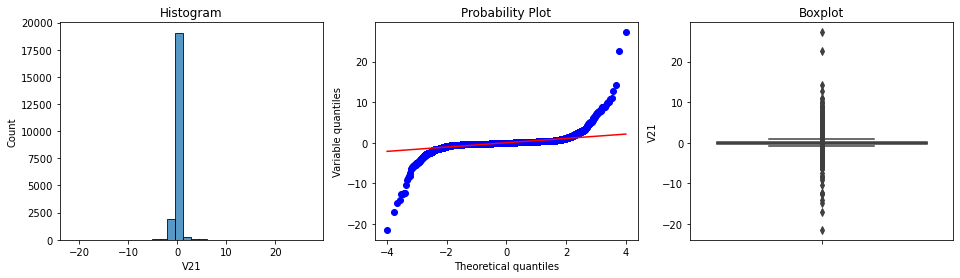

V21
Skewness is 2.42
Kurtosis is 214.96


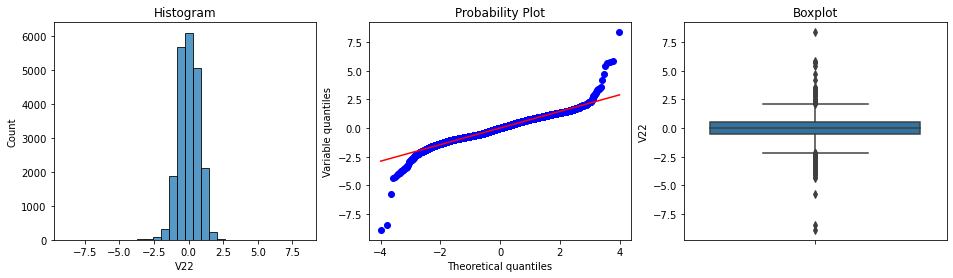

V22
Skewness is -0.12
Kurtosis is 3.90


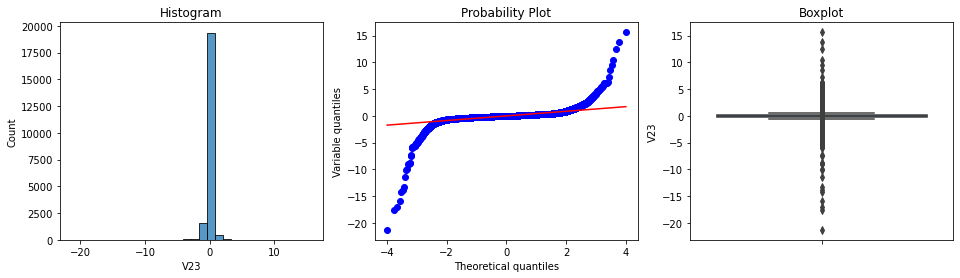

V23
Skewness is -5.05
Kurtosis is 244.54


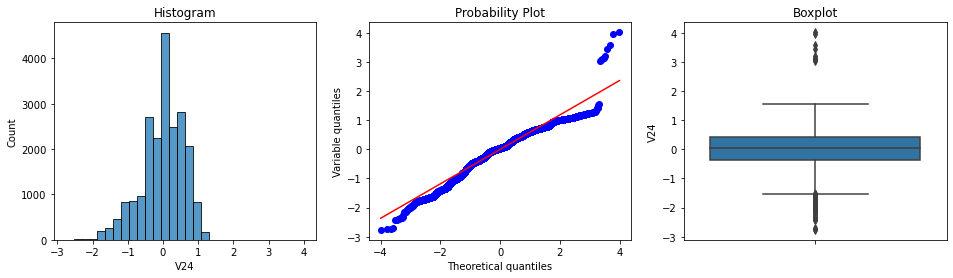

V24
Skewness is -0.55
Kurtosis is 0.70


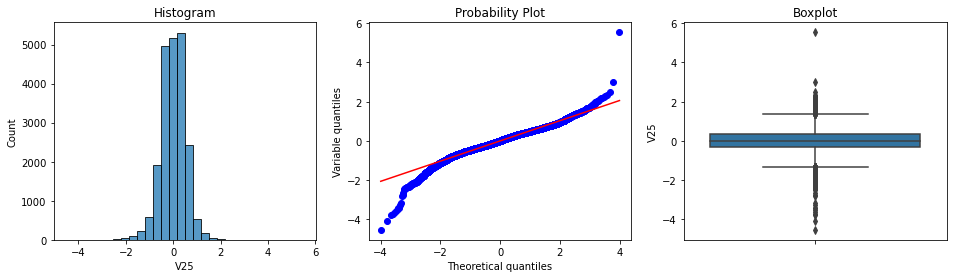

V25
Skewness is -0.42
Kurtosis is 2.96


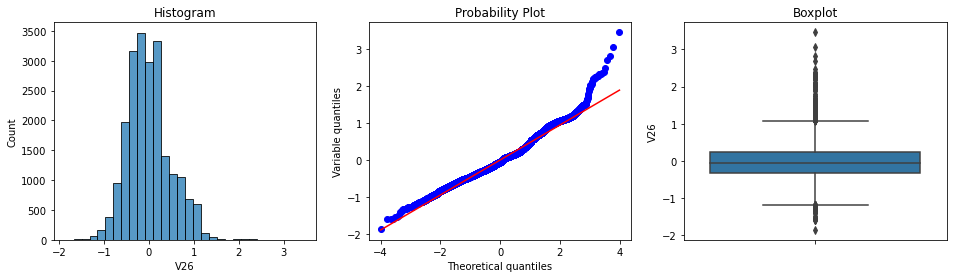

V26
Skewness is 0.55
Kurtosis is 0.77


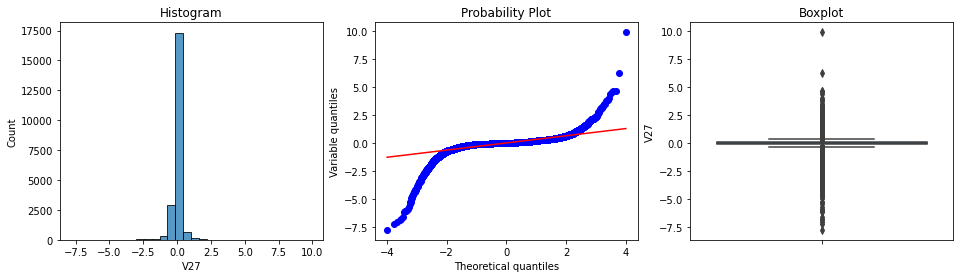

V27
Skewness is -2.86
Kurtosis is 76.78


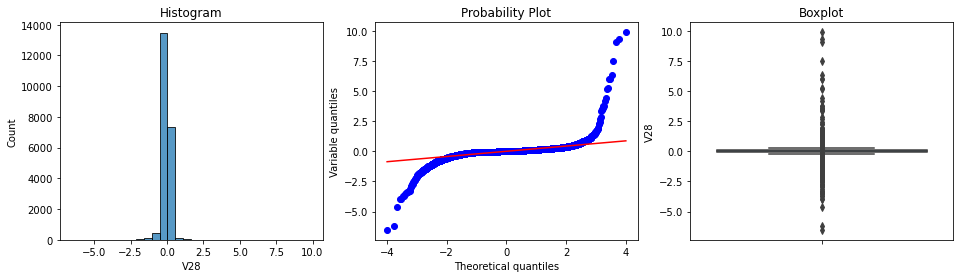

V28
Skewness is 4.60
Kurtosis is 227.34


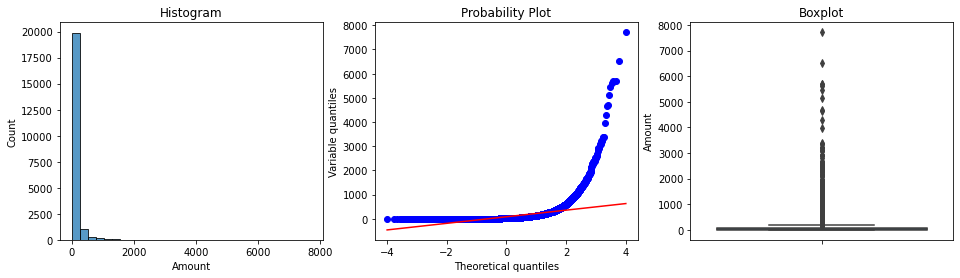

Amount
Skewness is 10.72
Kurtosis is 196.94


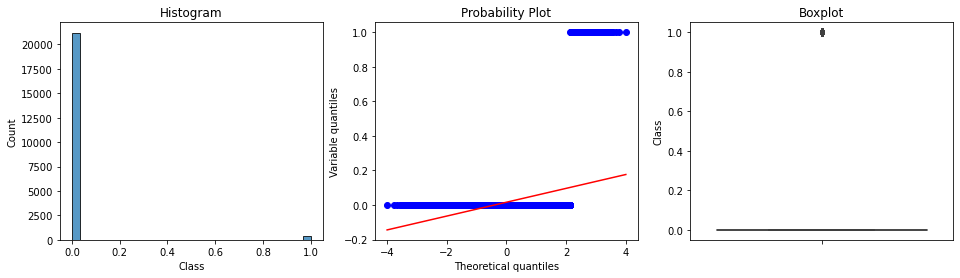

Class
Skewness is 7.70
Kurtosis is 57.31


In [29]:
# plotting all the independent variables
for column in df.columns[1:]:
    draw_and_test(column)

Discussion: some variables are highly skewed and heavy-tailed. This may be caused by minority class or by noise. Cleaning noise can cause distortion of the minority class.

Question: should skewness be fixed or left as is?
Answer: First, let's try to work with original dataset.

### Separating train and test sets

In [31]:
# separating dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Class'], axis=1),  # drop the target
    df['Class'],  # just the target
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape

((15085, 29), (6465, 29))

### Scaling

In [32]:
# scaling for further KNN technique
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Oversampling: SMOTE

Creates new samples by interpolation of samples of the minority class and any of its k nearest neighbours (also from the minority class). K is typically 5.

[SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

In [34]:
sm = SMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=42,  # for reproducibility
    k_neighbors=5,
    n_jobs=4
)

X_resampled_smote, y_resampled_smote = sm.fit_resample(X_train, y_train)

In [35]:
# size of undersampled data

X_resampled_smote.shape, y_resampled_smote.shape

((29684, 29), (29684,))

### Machine learning performance comparison

Let's compare model performance with and without undersampling.

In [36]:
# function to training of random forests and evaluating the performance

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=4, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [37]:
# evaluating performance of algorithm built
# using imbalanced dataset

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9785367461818675
Test set
Random Forests roc-auc: 0.9758616848215893


In [39]:
# evaluating performance of algorithm built
# using oversampled dataset

run_randomForests(X_resampled_smote,
                  X_test,
                  y_resampled_smote,
                  y_test)

Train set
Random Forests roc-auc: 0.9914949574134349
Test set
Random Forests roc-auc: 0.9770817627722856


Discussion: SMOTE slightly improved erformance on minority class in comparison with imbalances data.

### Estimating the Cost with Cross-Validation

In [40]:
# setting up initial random forest

rf = RandomForestClassifier(n_estimators=50,
                            random_state=42,
                            max_depth=2,
                            n_jobs=4,
                            class_weight=None)

In [41]:
# setting up parameter search grid
# including class weight

param_grid = {
  'n_estimators': [10, 50, 100, 200],
  'max_depth': [None, 2, 3, 4],
  'class_weight': [None, {0:1, 1:10}, {0:1, 1:100}],
}

In [42]:
search = GridSearchCV(estimator=rf,
                      scoring='roc_auc',
                      param_grid=param_grid,
                      cv=2,
                     ).fit(X_train, y_train)

In [43]:
search.best_score_

0.9701138425046401

In [44]:
search.best_params_

{'class_weight': {0: 1, 1: 100}, 'max_depth': 4, 'n_estimators': 100}

In [45]:
search.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 100}, max_depth=4, n_jobs=4,
                       random_state=42)

In [46]:
search.score(X_test, y_test)

0.9812677212697968

### Conclusion: 98% fraudulent credit card transactions were detected with Random Forest classifier using SMOTE technique to treat imbalanced data.